In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.result import marginal_counts
from qiskit.quantum_info import random_statevector
from qiskit_aer import Aer

# IBM Backend Service

In [3]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel="ibm_quantum", 
                               token="c41dfec13aef22f209d501fb16209bce90e7d851ea90316fcf31f1268ccf95fdce9a8bf298353ffbcb8a2b6c15ed4f452828ab70c490b931c5afb24ad87e4ab7")

In [4]:
backend = service.backend(name="ibm_brisbane")

In [5]:
## defs

def create_bell_pair(qc, a, b):
    qc.h(a)
    qc.cx(a,b)

def alice_gates(qc, psi, a):
    qc.cx(psi, a)
    qc.h(psi)

def measure_and_send(qc, a, b):
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)

def bob_gates(qc, qubit, crz, crx):
    qc.x(qubit).c_if(crx, 1)
    qc.z(qubit).c_if(crz, 1)

In [2]:
psi = random_statevector(2)

display(array_to_latex(psi, prefix="|\\psi\\rangle ="))

plot_bloch_multivector(psi)

NameError: name 'random_statevector' is not defined

In [7]:
## SETUP

# Protocol uses 3 qubits and 2 classical bits in two different registers
qr = QuantumRegister(3, name='q')
crz, crx = ClassicalRegister(1, name='crz'), ClassicalRegister(1, name='crx')
teleportation_circuit = QuantumCircuit(qr, crz, crx)

teleportation_circuit.initialize(psi, 0)
teleportation_circuit.barrier()

## STEP 1
create_bell_pair(teleportation_circuit, 1, 2)

## STEP 2
teleportation_circuit.barrier()
alice_gates(teleportation_circuit, 0, 1)

## STEP 3
measure_and_send(teleportation_circuit, 0, 1)

## STEP 4
teleportation_circuit.barrier()
bob_gates(teleportation_circuit, 2, crz, crx)



In [ ]:
## Running the circuit with ibm_computer and getting the probabilistic output.

transpiled_circuit = transpile(teleportation_circuit, backend=backend)

job = backend.run(transpiled_circuit, shots=1024)

result = job.result()

counts = result.get_counts()

print("Measurement result :", counts)


C:\Users\MKSDEVO\AppData\Local\Temp\ipykernel_15972\722640279.py:3: DeprecationWarning: backend.run() and related sessions methods are deprecated  as of qiskit-ibm-runtime 0.23 and will be removed no sooner than 6 months after the release date. More details can be found in the primitives migration guide https://docs.quantum.ibm.com/migration-guides/qiskit-runtime.
  job = backend.run(transpiled_circuit, shots=1024)


In [17]:
from qiskit_experiments.library import StateTomography


tomography_experiment = StateTomography(teleportation_circuit, [qr[2]])

job_t = tomography_experiment.run(backend, shots=1024)

tomo_result = job_t.analysis_results()

## analysis_results() will give a densitymatrix 2x2x2 from this state will be recunstructed and will be compared with alice's qubit state.

AnalysisResult
- name: state
- value: DensityMatrix([[ 0.11612956+0.j        , -0.01193576+0.01996528j,
                -0.00724284+0.01239692j, -0.01049805+0.0008138j ,
                 0.03548177+0.05989583j,  0.00341797+0.00105794j,
                 0.00065104-0.00366211j,  0.00219727+0.01245117j],
               [-0.01193576-0.01996528j,  0.14146593+0.j        ,
                 0.0082194 +0.01936849j, -0.00577799+0.00132921j,
                 0.01432292-0.00610352j, -0.04150391-0.05094401j,
                 0.01049805-0.00170898j, -0.01350911-0.00708008j],
               [-0.00724284-0.01239692j,  0.0082194 -0.01936849j,
                 0.10137261+0.j        , -0.00656467+0.00840929j,
                -0.00423177-0.00577799j,  0.00708008+0.00805664j,
                -0.0016276 -0.05810547j, -0.00341797-0.00626628j],
               [-0.01049805-0.0008138j , -0.00577799-0.00132921j,
                -0.00656467-0.00840929j,  0.13517253+0.j        ,
                -0.00610352+0.00268

NameError: name 'reconstructed_state' is not defined

In [1]:
density_matrix = None
for res in tomo_result:
    print(res)  # You can inspect the results
    if res.name == 'state':
        density_matrix = res.value

NameError: name 'tomo_result' is not defined

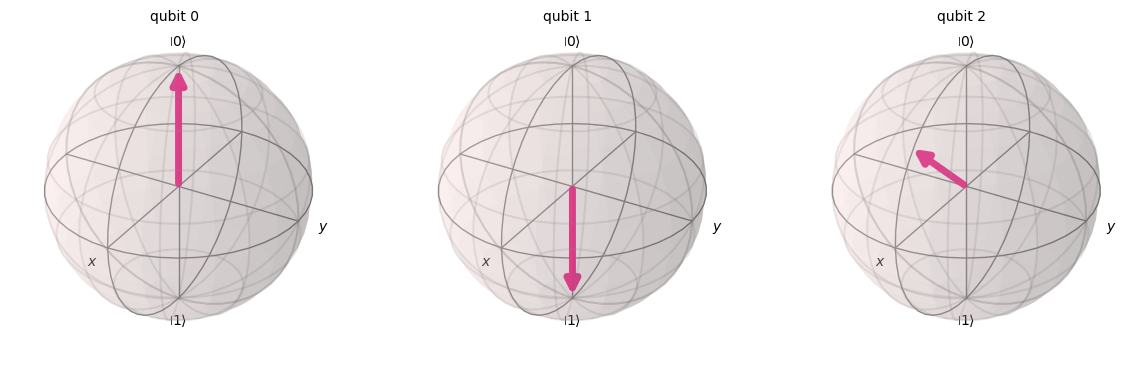

In [14]:
sim = Aer.get_backend('aer_simulator')
teleportation_circuit.save_statevector()
out_vector = sim.run(teleportation_circuit).result().get_statevector()
plot_bloch_multivector(out_vector)